# **STEP #1 PROBLEM STATEMENT**
The WiDS Datathon 2022 focuses on a prediction task involving roughly 100k observations of building energy usage records collected over 7 years and a number of states within the United States. The dataset consists of building characteristics (e.g. floor area, facility type etc), weather data for the location of the building (e.g. annual average temperature, annual total precipitation etc) as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to the a single building observed in a given year.

You are provided with two datasets: (1) the training dataset where the observed values of the Site EUI for each row is provided and (2) the test dataset where we withhold the observed values of the Site EUI for each row.

Covariates

-id: building id

-Year_Factor: anonymized year in which the weather and energy usage factors were observed

-State_Factor: anonymized state in which the building is located

-building_class: building classification

-facility_type: building usage type

-floor_area: floor area (in square feet) of the building

-year_built: year in which the building was constructed

-energy_star_rating: the energy star rating of the building

-ELEVATION: elevation of the building location

-january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building

-january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building

-january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building

-cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

-heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

-precipitation_inches: annual precipitation in inches at the location of the building

-snowfall_inches: annual snowfall in inches at the location of the building

-snowdepth_inches: annual snow depth in inches at the location of the building

-avg_temp: average temperature over a year at the location of the building

-days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building

-days_below_20F: total number of days below 20 degrees Fahrenheit at the location of the building

-days_below_10F: total number of days below 10 degrees Fahrenheit at the location of the building

-days_below_0F: total number of days below 0 degrees Fahrenheit at the location of the building

-days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building

-days_above_90F: total number of days above 90 degrees Fahrenheit at the location of the building

-days_above_100F: total number of days above 100 degrees Fahrenheit at the location of the building

-days_above_110F: total number of days above 110 degrees Fahrenheit at the location of the building

-direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

-direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

-max_wind_speed: maximum wind speed at the location of the building

-days_with_fog: number of days with fog at the location of the building

Target site_eui: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

## **DATA SOURCE:** https://www.kaggle.com/competitions/widsdatathon2022/data

# STEP #2 IMPORTING OF LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
# prompt: mount my drive and select the directory, Energy Efficient Building

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive
%cd Energy\ Efficient\ Building


Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive/Energy Efficient Building


# STEP #3 EDA + DATA-PROCESSING


In [3]:
# prompt: read train.csv from the directory /Energy Efficient Building

import pandas as pd

train_df = pd.read_csv('/content/drive/My Drive/Energy Efficient Building/train.csv')



In [11]:
# prompt: train_df.head

print(train_df.head())


   Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36         

In [4]:
# prompt: Describe

train_df.describe()


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [5]:
# prompt: info of train_df

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [13]:
# prompt: train_df.colums

print(train_df.columns)


Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [6]:
# prompt: read test.csv from the directory Energy Efficient Building

import pandas as pd
test_df = pd.read_csv('/content/drive/My Drive/Energy Efficient Building/test.csv')


In [10]:
# prompt: train_df.head

test_df.head()


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [7]:
# prompt: Describe test_df

test_df.describe()


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.0,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
mean,7.0,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,60.008449,21.705100,41.634886,...,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.0,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,5.874699,9.774624,5.528689,...,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.0,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,42.000000,9.000000,33.428571,...,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.0,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,54.000000,9.000000,36.053571,...,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000,78183.000000
50%,7.0,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,59.000000,22.000000,41.625000,...,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000,80609.000000
75%,7.0,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,64.000000,28.000000,45.685185,...,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000,83035.000000
max,7.0,6.353396e+06,2016.000000,100.000000,812.000000,38.000000,50.596774,71.000000,40.000000,54.482143,...,5.000000,122.000000,41.000000,2.000000,0.0,360.000000,350.000000,23.300000,250.000000,85461.000000


In [8]:
# prompt: info test_df

test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

Droping building id

In [14]:
#It creates a new DataFrame called test_submission containing only the "id" column from the DataFrame test_df.
test_submission = pd.DataFrame(test_df["id"])

#Removes the "id" column from the DataFrame train_df and test_df. This column is dropped along the columns axis (axis=1).
train_df.drop(columns=["id"], axis=1, inplace=True)
test_df.drop(columns=["id"], axis=1, inplace=True)

In [15]:
# prompt: print dataset shape for train model

print("Train dataset shape:", train_df.shape)


Train dataset shape: (75757, 63)


In [16]:
# prompt: print(f'Training dataset shape: {test_df.shape}')

print(f'Training dataset shape: {train_df.shape}')


Training dataset shape: (75757, 63)


In [17]:
print(f'Training dataset shape: {train_df.shape}')
print(f'Training dataset shape: {test_df.shape}')

Training dataset shape: (75757, 63)
Training dataset shape: (9705, 62)


Dropping duplicate rows

In [19]:
#calculates and stores the initial number of rows in the DataFrame train_df before dropping duplicates
l0 = train_df.shape[0]

#removes duplicate rows from the DataFrame train_df and modifies it in place.
#It retains the first occurrence of each unique row and removes subsequent duplicates.
train_df.drop_duplicates(inplace=True)

#After dropping duplicates, this line calculates and stores the new number of rows in the DataFrame train_df
l1 = train_df.shape[0]

#f-string to print out the difference between the initial number of rows
#and the new number of rows after dropping duplicates, indicating how many rows were removed due to duplication.
print(f'{l0-l1} rows were dropped.')

39 rows were dropped.


Check proportion of missing values in each column

In [20]:
def count_missing_values(dataframe):
    #calculate the total missing values in the dataframe
    total = dataframe.isnull().sum()

    #calculate the data and multiply by 100
    percent = (dataframe.isnull().sum())*100/(len(dataframe))

    #Concatenates the total and percent Series along the columns axis (axis=1) to create a DataFrame called missing_data.
    # Each row in missing_data contains the total count of missing values and the corresponding percentage for a specific column.
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    #Filters columns with no value and places it back in the missing_data
    missing_data = missing_data[missing_data['Total']>0]

    #Sortes in descending order based on the total count of missing values
    missing_data.sort_values('Total', ascending=False, inplace=True)
    print(missing_data)

    return

count_missing_values(train_df)

                           Total    Percent
days_with_fog              45783  60.465147
direction_peak_wind_speed  41798  55.202198
direction_max_wind_speed   41070  54.240735
max_wind_speed             41070  54.240735
energy_star_rating         26682  35.238649
year_built                  1817   2.399694


In [21]:
count_missing_values(test_df)

                           Total    Percent
days_with_fog               9113  93.948454
direction_max_wind_speed    8571  88.360825
direction_peak_wind_speed   8571  88.360825
max_wind_speed              8571  88.360825
energy_star_rating          2254  23.237113
year_built                    92   0.948454


More than 85% of values in the columns days_with_fog, direction_max_wind_speed, direction_peak_wind_speed and max_wind_speed are missing in the test set, so they will not be very useful as features. We can drop them.

In [22]:
#Creates a variable to store the columns with 85% missing data
must_drop = ["days_with_fog", "direction_max_wind_speed", "direction_peak_wind_speed", "max_wind_speed"]

#Perform on the axis and appended to both train and test df
train_df.drop(columns=must_drop, axis=1, inplace=True)
test_df.drop(columns=must_drop, axis=1, inplace=True)

Describe the train and test dataset to see the outcome

In [24]:
# prompt: head train

train_df.head()


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,56.972603,0,0,0,0,14,0,0,0,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,56.972603,0,0,0,0,14,0,0,0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,56.972603,0,0,0,0,14,0,0,0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,56.972603,0,0,0,0,14,0,0,0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,56.972603,0,0,0,0,14,0,0,0,3.899395


In [25]:
# prompt: columns of train

print(train_df.columns)


Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [26]:
# prompt: info test

print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 9700 entries, 0 to 9704
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Factor           9700 non-null   int64  
 1   State_Factor          9700 non-null   object 
 2   building_class        9700 non-null   object 
 3   facility_type         9700 non-null   object 
 4   floor_area            9700 non-null   float64
 5   year_built            9608 non-null   float64
 6   energy_star_rating    7446 non-null   float64
 7   ELEVATION             9700 non-null   float64
 8   january_min_temp      9700 non-null   int64  
 9   january_avg_temp      9700 non-null   float64
 10  january_max_temp      9700 non-null   int64  
 11  february_min_temp     9700 non-null   int64  
 12  february_avg_temp     9700 non-null   float64
 13  february_max_temp     9700 non-null   int64  
 14  march_min_temp        9700 non-null   int64  
 15  march_avg_temp        9700

In [63]:
# prompt: columns of test

print(test_df.columns)


Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F

Compute pair-wise correlation between numeric columns and drop one

In [ ]:
#january_min_temp dropped and stored in must_drop from both data set
must_drop = ['january_min_temp']
train_df.drop(columns=must_drop, axis=1, inplace=True)
test_df.drop(columns=must_drop, axis=1, inplace=True)

In [64]:
# prompt: print both train and test dataset shape

print(f'Training dataset shape: {train_df.shape}')
print(f'Testing dataset shape: {test_df.shape}')


Training dataset shape: (75718, 67)
Testing dataset shape: (9700, 67)


Separate features and labels

In [35]:
#Set target site_eui in train_y from the train_df
train_y = train_df["site_eui"]

#Drops the column site_eui from train_df
train_df.drop("site_eui", axis=1, inplace=True)

Separate categorical and numerical features

In [73]:
#Variable cat_column to hold object and create a list
cat_columns = train_df.dtypes[train_df.dtypes == "object"].index.tolist()
numerical_columns = train_df.dtypes[train_df.dtypes == "object"].index.tolist()
print(cat_columns)


[]


Distribution of uniques values of each categorical feature in the dataset

<ipython-input-37-f2e6ec00dbca>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


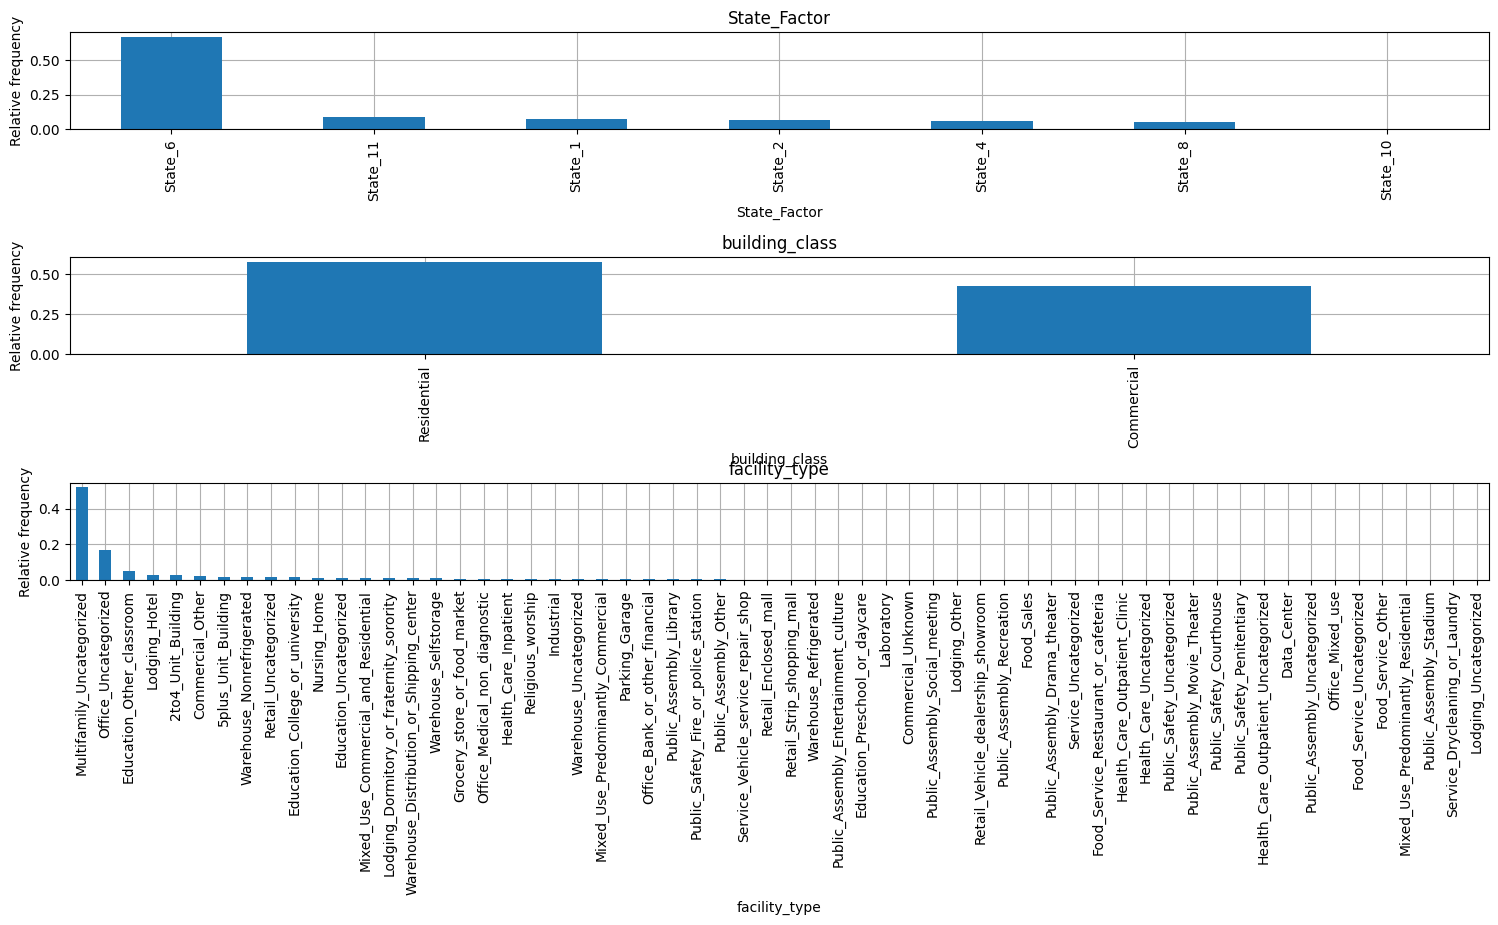

In [37]:
#Function plot_distbn
def plot_distbn(column, column_name, num):
    plt.subplot(num) #This line sets the current subplot to the number specified by num
    column.value_counts(normalize=True).plot(kind='bar') #
    plt.title(column_name) # Sets the title of the subplot to the name of the column
    plt.ylabel('Relative frequency') #Sets the label for the y-axis as 'Relative frequency'.
    plt.tight_layout() # Automatically adjusts subplot parameters to give specified padding.
    plt.grid(True)

    return column.value_counts(normalize=True) #returns the relative frequencies of each category in the column.

plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(15,6))
rel_freqs1 = plot_distbn(train_df[cat_columns[0]], cat_columns[0], 311)
rel_freqs2 = plot_distbn(train_df[cat_columns[1]], cat_columns[1], 312)
rel_freqs3 = plot_distbn(train_df[cat_columns[2]], cat_columns[2], 313)

In [38]:
#Relative frequency represents the proportion of observations that fall into each category
#or level of a variable relative to the total number of observations.
rel_freqs3

facility_type
Multifamily_Uncategorized                    0.520748
Office_Uncategorized                         0.165192
Education_Other_classroom                    0.050979
Lodging_Hotel                                0.027708
2to4_Unit_Building                           0.025001
Commercial_Other                             0.023033
5plus_Unit_Building                          0.016812
Warehouse_Nonrefrigerated                    0.016575
Retail_Uncategorized                         0.014924
Education_College_or_university              0.013907
Nursing_Home                                 0.010196
Education_Uncategorized                      0.009298
Mixed_Use_Commercial_and_Residential         0.008875
Lodging_Dormitory_or_fraternity_sorority     0.008835
Warehouse_Distribution_or_Shipping_center    0.007977
Warehouse_Selfstorage                        0.007620
Grocery_store_or_food_market                 0.005917
Office_Medical_non_diagnostic                0.005903
Health_Care_In

In [39]:
#Summing up the relative frequencies of the first six categories or levels of a variable represented by "rel_freqs3."
#Without the specific values of "rel_freqs3,"
#it's difficult to provide an exact numerical value. However, if "rel_freqs3" represents the relative frequencies of some variable, such as the proportion of observations falling into each category, then "sum(rel_freqs3[:6])" would calculate the cumulative relative frequency for the first six categories.
sum(rel_freqs3[:6])

0.8126601336538207

In [40]:
#Retrieve from the relative frequency3(rel_freqs3.index)
# and convert it into a list and store in the variable, important
important = rel_freqs3.index[:6].tolist()
print(important)

['Multifamily_Uncategorized', 'Office_Uncategorized', 'Education_Other_classroom', 'Lodging_Hotel', '2to4_Unit_Building', 'Commercial_Other']


state_factor seems to have an even spread (except for state_6 which contains >50% of the buildings). One-hot encoding for this feature.

Building class is a binary variable.

The distribution of facility_type has a long tail. Top 6 values claim >80% of the data points.Put all values into one value, and perform one-hot encoding with these 7 values for this feature.

In [42]:
#selects the 'facility_type' column from the 'train_df' DataFrame.
#It then applies a condition ~train_df['facility_type'].isin(significant), which checks if the values in the 'facility_type' column are not in the list of 'significant' categories.
#For values that do not belong to the 'significant' categories, it assigns the value 'Others' to them same as the test data frame
train_df['facility_type'].loc[~train_df['facility_type'].isin(important)] = 'Others'
test_df['facility_type'].loc[~test_df['facility_type'].isin(important)] = 'Others'
train_df[:10]

<ipython-input-42-5a31b502d60c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['facility_type'].loc[~train_df['facility_type'].isin(important)] = 'Others'
<ipython-input-42-5a31b502d60c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['facility_type'].loc[~test_df['facility_type'].isin(important)] = 'Others'


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,january_max_temp,...,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F
0,1,State_1,Commercial,Others,61242.0,1942.0,11.0,2.4,50.5,68,...,0,56.972603,0,0,0,0,14,0,0,0
1,1,State_1,Commercial,Others,274000.0,1955.0,45.0,1.8,50.5,68,...,0,56.972603,0,0,0,0,14,0,0,0
2,1,State_1,Commercial,Others,280025.0,1951.0,97.0,1.8,50.5,68,...,0,56.972603,0,0,0,0,14,0,0,0
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,50.5,68,...,0,56.972603,0,0,0,0,14,0,0,0
4,1,State_1,Commercial,Others,66000.0,1985.0,100.0,2.4,50.5,68,...,0,56.972603,0,0,0,0,14,0,0,0
5,1,State_1,Commercial,Others,119900.0,1956.0,NaN,2.4,50.5,68,...,0,56.972603,0,0,0,0,14,0,0,0
6,1,State_1,Commercial,Others,91367.0,1982.0,56.0,2.4,50.5,68,...,0,56.972603,0,0,0,0,14,0,0,0
7,1,State_1,Commercial,Others,50422.0,1947.0,99.0,2.4,50.5,68,...,0,56.972603,0,0,0,0,14,0,0,0
8,1,State_1,Commercial,Office_Uncategorized,122020.0,1929.0,98.0,2.4,50.5,68,...,0,56.972603,0,0,0,0,14,0,0,0
9,1,State_1,Commercial,Office_Uncategorized,102612.0,1979.0,83.0,2.4,50.5,68,...,0,56.972603,0,0,0,0,14,0,0,0


# Training the data

In [43]:
for column in cat_columns:
    dummies = pd.get_dummies(train_df[column], prefix=column, drop_first=True)
    train_df = pd.concat([train_df, dummies],axis=1)
    train_df.drop(column, axis=1, inplace=True)

# Testing the data

In [45]:
for column in cat_columns:
  dummies = pd.get_dummies(test_df[column], prefix=column, drop_first=True)
  test_df = pd.concat([test_df, dummies],axis=1)
  test_df.drop(column, axis=1, inplace=True)


# Missing data in training test dataframe


In [46]:
missing_cols = set(train_df.columns) - set(test_df.columns)

Add a missing column in test set with default value equal to 0

In [47]:
for c in missing_cols:
    test_df[c] = 0

Order of columns in the test set is in the same order in train set

In [48]:
test_df = test_df[train_df.columns]


In [50]:
#Display feature of train_df
train_df.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F

In [51]:
len(numerical_columns)

54

There are 54 numerical features, out of which energy_star_rating and year_built has missing values. We will impute the features of these values using the median

In [52]:
train_df[numerical_columns] = train_df[numerical_columns].fillna(train_df[numerical_columns].median())
test_df[numerical_columns] = test_df[numerical_columns].fillna(test_df[numerical_columns].median())

In [53]:
#Scaling numerical features by preprocessing
#It computes the mean and standard deviation necessary for standardization based on the training and testing data.
#It subtracts the mean and divides by the standard deviation for each feature, effectively standardizing them.
#Data is then replaced with the standardized data
scaler = preprocessing.StandardScaler().fit(train_df[numerical_columns])
train_df[numerical_columns] = scaler.transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# MODEL BUILDING AND EVALUATION

In [54]:
from sklearn.linear_model import LinearRegression # Models a relationship between one or more independent variables.
from sklearn.neighbors import KNeighborsRegressor #K-nearest neighbors predicts the target variable by averaging the values of its k nearest neighbors.
from sklearn.tree import DecisionTreeRegressor #Model by recursively partitioning the feature into regions and fitting a simple mode.
from sklearn.ensemble import RandomForestRegressor #Fits multiple decision tree regressors on various sub-samples of the dataset and find average to improve predictive performance.
from xgboost import XGBRegressor # It effectively and scalable implements gradient boosting machines with powerful collaborative learning methods


Listing the models

In [55]:
models = []
models.append(('Linear regression', LinearRegression()))
models.append(('k-Nearest neighbor', KNeighborsRegressor()))
models.append(('Decision tree', DecisionTreeRegressor()))
models.append(('Random forest', RandomForestRegressor()))
models.append(('XGBoost classifier', XGBRegressor()))

In [57]:
#split the dataset into k consecutive folds (or subsets) for training and testing.
from sklearn.model_selection import KFold # Split data into training and testing using cross validation
from sklearn.model_selection import cross_val_score #cross validatin score

col = ['Algorithm', 'Mean RMSE', 'S.D. RMSE'] # Contains the algorithm, Mean Root Square Error and Standard Deviation of RMSE
df_results = pd.DataFrame(columns=col)
i = 0 # This variable will be used as an index counter while populating the DataFrame.


Fitting the models

In [58]:
#Cross-validation for each model in the models list, calculates mean and standard deviation of RMSE,
#and stores the results in a DataFrame for comparison. The results are then sorted based on mean RMSE values.

for name, model in models:
    print(f'Fitting {name} model...')
    kfold = KFold(n_splits=5, shuffle=True, random_state=10)  # 5-fold cross-validation
    cv_rmse_results = cross_val_score(model, train_df, train_y, cv=5, scoring="neg_root_mean_squared_error")
    cv_rmse_results *= -1 #Negative values multiplied by -1, to get postive
    df_results.loc[i] = [name,
                         cv_rmse_results.mean(),
                         cv_rmse_results.std(),
                         ]
    i += 1
df_results.sort_values(by=['Mean RMSE'])

Fitting Linear regression model...
Fitting k-Nearest neighbor model...
Fitting Decision tree model...
Fitting Random forest model...
Fitting XGBoost classifier model...


,Algorithm,Mean RMSE,S.D. RMSE
3,Random forest,5.298809e+01,1.217196e+01
1,k-Nearest neighbor,5.850084e+01,7.460454e+00
4,XGBoost classifier,6.167507e+01,2.253207e+01
2,Decision tree,7.723845e+01,1.959291e+01
0,Linear regression,1.910536e+12,3.821073e+12


from matplotlib import pyplot as plt
_df_0['Mean RMSE'].plot(kind='hist', bins=20, title='Mean RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['S.D. RMSE'].plot(kind='hist', bins=20, title='S.D. RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Mean RMSE', y='S.D. RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mean RMSE']
  ys = series['S.D. RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Mean RMSE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Algorithm')):
  _plot_series(series, series_name, i)
  fig.legend(title='Algorithm', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mean RMSE')
_ = plt.ylabel('S.D. RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Mean RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Mean RMSE'}, axis=1)
              .sort_values('Mean RMSE', ascending=True))
  xs = counted['Mean RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Mean RMSE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Algorithm')):
  _plot_series(series, series_name, i)
  fig.legend(title='Algorithm', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mean RMSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Mean RMSE'].plot(kind='line', figsize=(8, 4), title='Mean RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['S.D. RMSE'].plot(kind='line', figsize=(8, 4), title='S.D. RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='Mean RMSE', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='S.D. RMSE', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Random Forest has the lowest RMSE with defaulf parameters

In [59]:
model = RandomForestRegressor()
rf = model.fit(train_df, train_y)
pred = rf.predict(test_df)

In [61]:
print(f"Length of pred: {len(pred)}")
print(f"Length of test_submission: {len(test_submission)}")

Length of pred: 9700
Length of test_submission: 9705


In [62]:
# prompt: test_submission["site_eui"] = pred, using only 9700 lenght of pred
# test_submission

test_submission["site_eui"] = pred[:9700]
test_submission.head()


ValueError: Length of values (9700) does not match length of index (9705)